## Assignment 6 - Crime Analytics: Visualization of Incident Reports

#### Seattle Dataset:
Seattle dataset "seattle_incidents_summer_2014.csv" was used in the research. It has 32779 rows and 19 columns.
Deep analysis of datasets (distributions for each feature etc.) is not needed due to the task

#### Structure:
In this research some problems were observed:
- 1.1 How do incidents vary by time of day?
- 1.2 Which incidents are most common in the evening?
- 1.3 During what periods of the day are robberies most common?
- 2.1 How do incidents vary by neighborhood?
- 2.2 Which incidents are most common in the city center?
- 2.3 In what areas or neighborhoods are robberies or thefts most common?
- 3.1 How do incidents vary month to month

#### Please note:
After each plot there are short explanation and analysis of the plot.

In [8]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
# Unique function to get unique items in the list() or numpy.array()
def unique(input_list):
    output_list = list()
    for item in input_list:
        if item not in output_list:
            output_list.append(item)
    return output_list

In [16]:
# Read the Data
d = pd.read_csv('https://raw.githubusercontent.com/isergii/Assignment6/master/seattle_incidents_summer_2014.csv', 
                header=0, low_memory=False)

In [6]:
# Prepare variables according to the task
dates = np.array([])
hours = np.array([])
days = np.array([])
months = np.array([])
incids = np.array([])
neighs = np.array([])
for i in range(len(d)):
    date_ = datetime.datetime.strptime(d['Date_Reported'][i], "%m/%d/%Y %H:%M")
    dates = np.append(dates, np.array([date_]))
    hours = np.append(hours, np.array([date_.time().hour]))
    days = np.append(days, np.array([date_.day]))
    months = np.append(months, np.array([date_.month]))
    incids = np.append(incids, d['Summarized_Offense_Description'][i])
    neighs = np.append(neighs, d['District_Sector'][i])

incids_un = unique(incids)
incids_un.remove('[INC - CASE DC USE ONLY]')
neighs_un = unique(neighs)
neighs_un.remove('nan')

h = range(24)
m = range(1, 13)

### 1.1 How do incidents vary by time of day?

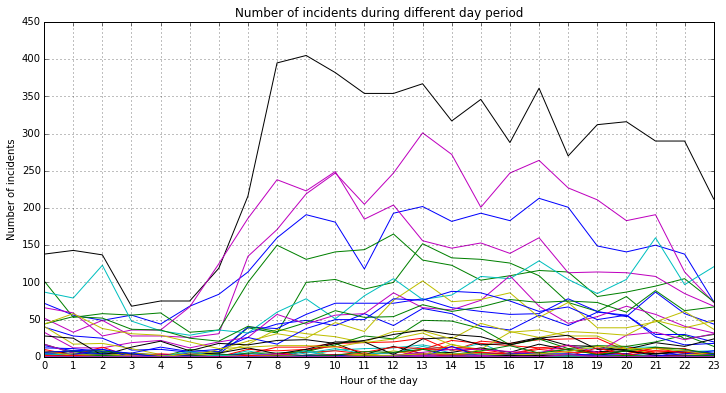

In [17]:
# 1.1 How do incidents vary by time of day?
y = np.zeros((len(h), len(incids_un)))
for i in range(len(h)):
    for j in range(len(incids_un)):
        y[i, j] = sum(np.logical_and(hours == h[i], incids == incids_un[j]))

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Hour of the day')
plt.ylabel('Number of incidents')
plt.title('Number of incidents during different day period')
plt.plot(h, y, '-', linewidth=1)
plt.xlim([0, 23])
plt.xticks(h, h)
plt.grid(True)
plt.show()

- This plot shows that the biggest part of incidents exist between approximately 8:00 and 21:00. This is average statistics across all types of incidents.

### 1.2 Which incidents are most common in the evening?

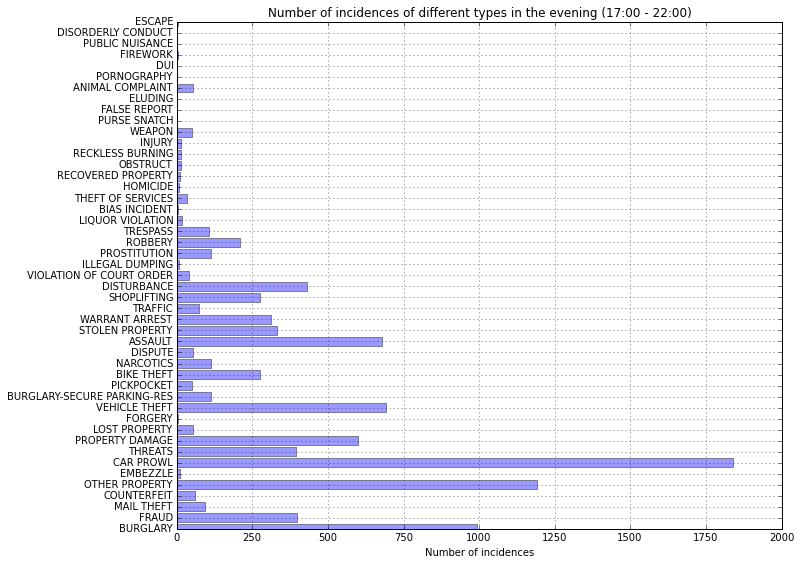

In [10]:
# 1.2 Which incidents are most common in the evening?
incids_evening = np.zeros((len(incids_un), 1))
y_pos = np.arange(len(incids_un))
for i in range(len(incids_un)):
    incids_evening[i, 0] = sum(np.logical_and(incids == incids_un[i], np.logical_and(hours >= 17, hours <= 22)))

plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.25, bottom=0.07, right=0.95, top=0.95, wspace=0, hspace=0)
plt.barh(y_pos, incids_evening, align='center', alpha=0.4)
plt.yticks(y_pos, incids_un)
plt.xticks(range(0, 2250, 250))
plt.ylim([y_pos[0], y_pos[-1]])
plt.xlabel('Number of incidences')
plt.title('Number of incidences of different types in the evening (17:00 - 22:00)')
plt.grid(True)
plt.show()

- This plot shows that "CAR PROWL" is the most prevailing incident type in the evening. Such incidents as "OTHER PROSPERITY", "BURGLARY", "VEHICLE THEFT", "ASSAULT" are also more frequent than others (averall there are 47 types of incidents)

### 1.3 During what periods of the day are robberies most common?

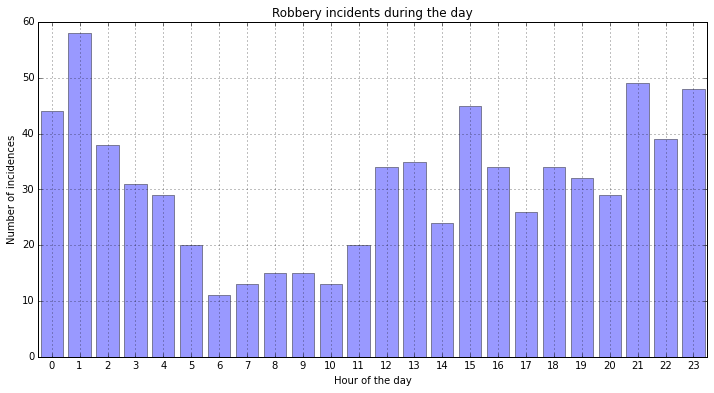

In [11]:
# 1.3 During what periods of the day are robberies most common?
y = np.zeros((len(h), 1))
x_pos = np.arange(len(h))
for i in range(len(h)):
    y[i, 0] = sum(np.logical_and(incids == 'ROBBERY', hours == h[i]))

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(x_pos, y, align='center', alpha=0.4)
plt.xticks(x_pos)
plt.xlim([x_pos[0]-0.5, x_pos[-1]+0.5])
plt.xlabel('Hour of the day')
plt.ylabel('Number of incidences')
plt.title('Robbery incidents during the day')
plt.grid(True)
plt.show()

- This plot shows that ROBBERYs are most frequent at night at 1AM. Also it is remarkably frequent at 9-11 PM. Lowest number of incidents for ROBBERY type is the morning (5-11 AM).

### 2.1 How do incidents vary by neighborhood?

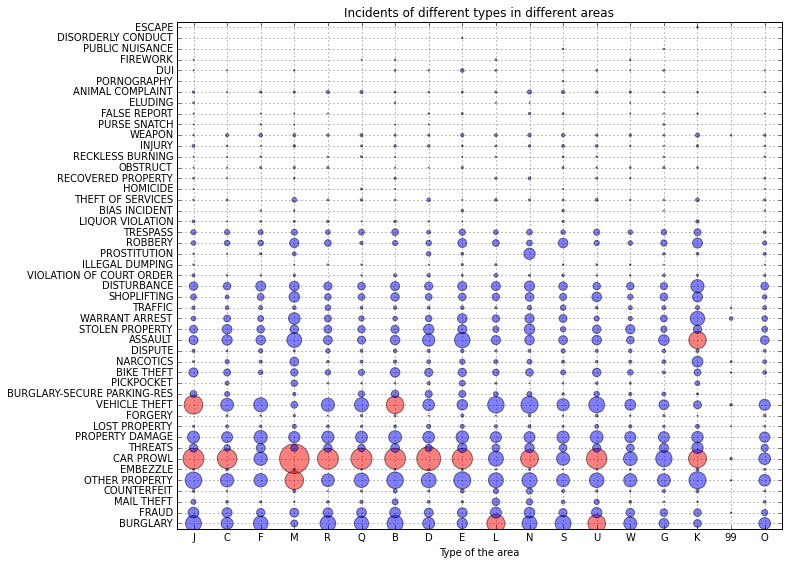

In [18]:
# 2.1 How do incidents vary by neighborhood?
sc = np.zeros((len(neighs_un)*len(incids_un), 1))
x = np.zeros((len(neighs_un)*len(incids_un), 1))
y = np.zeros((len(neighs_un)*len(incids_un), 1))
x_pos = np.arange(len(neighs_un))
y_pos = np.arange(len(incids_un))
c = np.array([])
k = -1
for i in range(len(neighs_un)):
    for j in range(len(incids_un)):
        k += 1
        x[k] = x_pos[i]
        y[k] = y_pos[j]
        sc[k] = sum(np.logical_and(incids == incids_un[j], neighs == neighs_un[i]))
        if sc[k] < 300:
            c = np.append(c, np.array(['b']))
        else:
            c = np.append(c, np.array(['r']))

plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.25, bottom=0.07, right=0.95, top=0.95, wspace=0, hspace=0)
plt.scatter(x, y, s=sc, c=c, alpha=0.5)
plt.xticks(x_pos, neighs_un)
plt.xlim([x_pos[0]-0.5, x_pos[-1]+0.5])
plt.yticks(y_pos, incids_un)
plt.ylim([y_pos[0]-0.5, y_pos[-1]+0.5])
plt.xlabel('Type of the area')
plt.title('Incidents of different types in different areas')
plt.grid(True)
plt.show()

- On this plot red circles shows the case where number of incidents is more than 300. So the worst case is "CAR PROWL" in the "M" city area. Overall "CAR PROWL" is most frequent incident almost in all city areas. Also it seems that "CAR PROWL" is the most frequent incident across all incidents.

### 2.2 Which incidents are most common in the city center?

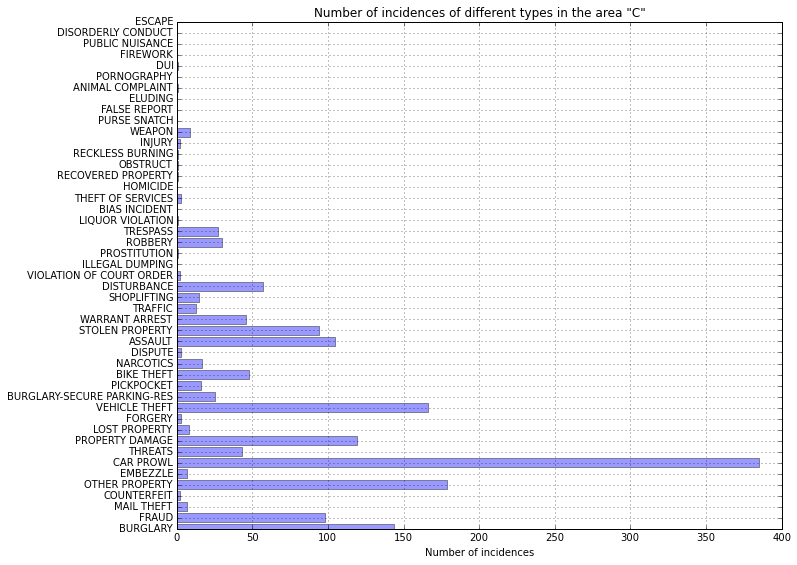

In [13]:
# 2.2 Which incidents are most common in the city center?
incids_center = np.zeros((len(incids_un), 1))
y_pos = np.arange(len(incids_un))
for i in range(len(incids_un)):
    incids_center[i, 0] = sum(np.logical_and(incids == incids_un[i], neighs == 'C'))

plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.25, bottom=0.07, right=0.95, top=0.95, wspace=0, hspace=0)
plt.barh(y_pos, incids_center, align='center', alpha=0.4)
plt.yticks(y_pos, incids_un)
plt.xticks(range(0, 450, 50))
plt.ylim([y_pos[0], y_pos[-1]])
plt.xlabel('Number of incidences')
plt.title('Number of incidences of different types in the area "C"')
plt.grid(True)
plt.show()

- This plot confirms results of previous plot that "CAR PROWL" is the most frequent incidence (on this plot - in the "C" area).

### 2.3 In what areas or neighborhoods are robberies or thefts most common?

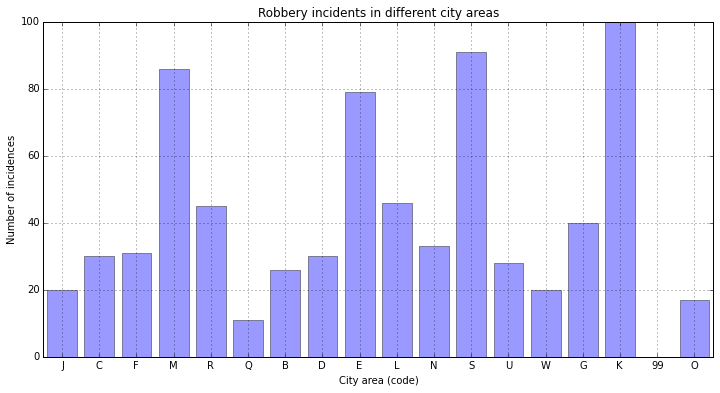

In [14]:
# 2.3 In what areas or neighborhoods are robberies or thefts most common?
y = np.zeros((len(neighs_un), 1))
x_pos = np.arange(len(neighs_un))
for i in range(len(neighs_un)):
    y[i, 0] = sum(np.logical_and(incids == 'ROBBERY', neighs == neighs_un[i]))

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(x_pos, y, align='center', alpha=0.4)
plt.xticks(x_pos, neighs_un)
plt.xlim([x_pos[0]-0.5, x_pos[-1]+0.5])
plt.xlabel('City area (code)')
plt.ylabel('Number of incidences')
plt.title('Robbery incidents in different city areas')
plt.grid(True)
plt.show()

- This plot shows that ROBBERies are most common in "M", "E", "S", "K" city areas.

### 3.1 How do incidents vary month to month

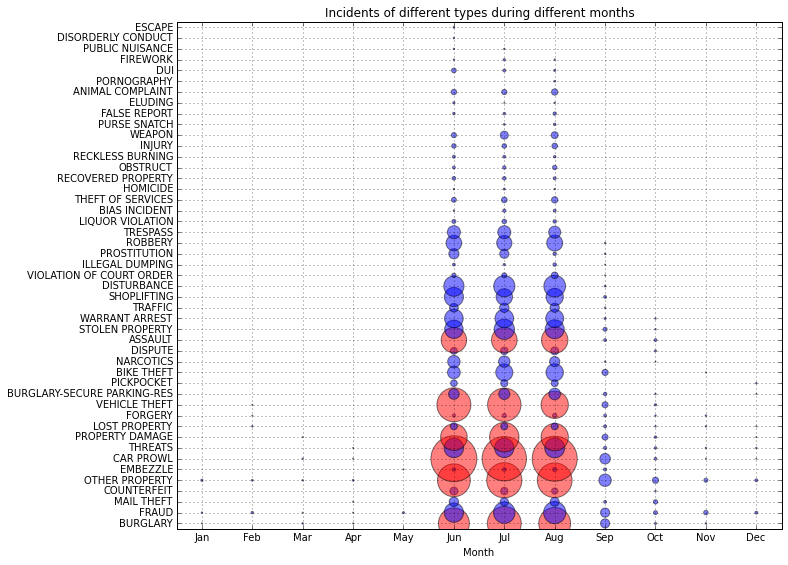

In [15]:
# 3.1 How do incidents vary month to month
sc = np.zeros((len(m)*len(incids_un), 1))
x = np.zeros((len(m)*len(incids_un), 1))
y = np.zeros((len(m)*len(incids_un), 1))
x_pos = np.arange(len(m))
y_pos = np.arange(len(incids_un))
c = np.array([])
k = -1
for i in range(len(m)):
    for j in range(len(incids_un)):
        k += 1
        x[k] = x_pos[i]
        y[k] = y_pos[j]
        sc[k] = sum(np.logical_and(incids == incids_un[j], months == m[i]))
        if sc[k] < 500:
            c = np.append(c, np.array(['b']))
        else:
            c = np.append(c, np.array(['r']))

plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.25, bottom=0.07, right=0.95, top=0.95, wspace=0, hspace=0)
plt.scatter(x, y, s=sc, c=c, alpha=0.5)
plt.xticks(x_pos, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlim([x_pos[0]-0.5, x_pos[-1]+0.5])
plt.yticks(y_pos, incids_un)
plt.ylim([y_pos[0]-0.5, y_pos[-1]+0.5])
plt.xlabel('Month')
plt.title('Incidents of different types during different months')
plt.grid(True)
plt.show()

- This plot shows that "CAR PROWL", "OTHER PROPERTY", "BURGLARY", "VEHICLE THEFT", "ASSAULT", "PROPERTY DAMAGE" types of incidents are most common during the summer (note that dataset doesn't contain full data for other seasons, so we cannot judge about other months except Jun, Jul and Aug). Also it should be noticed that it doesn't matter what month we are looking at, number of incidents is approximately the same for different type of incident.